In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline

In [29]:
players_merged_df = pd.read_csv('Tables/players_merged_df.csv')

In [30]:
players_merged_df.sort_values(by='active_from').head()

,name,active_from,active_to,birth_date,position,ppg,trb,ast,height_inches,weight,shooting_hand,draft,college,hs_name,hs_city,hs_state,url
3712,Johnny Simmons,1947,1947,1924-07-07,G,NaN,NaN,NaN,73.0,184.0,NaN,NaN,New York University,NaN,NaN,NaN,/players/s/simmojo01.html
2781,Walt Miller,1947,1947,1915-07-30,F,NaN,NaN,NaN,74.0,190.0,NaN,NaN,Duquesne University,NaN,NaN,NaN,/players/m/millewa01.html
2783,John Mills,1947,1947,1919-09-07,C-F,NaN,NaN,NaN,80.0,203.0,NaN,NaN,Western Kentucky University,NaN,NaN,NaN,/players/m/millsjo01.html
3750,Belus Smawley,1947,1952,1918-03-20,G-F,12.7,2.8,2.3,73.0,195.0,Right,NaN,Appalachian State University,Ellenboro,Ellenboro,North Carolina,/players/s/smawlbe01.html
625,Don Carlson,1947,1951,1919-03-22,G-F,8.0,1.7,1.8,72.0,170.0,Right,NaN,University of Minnesota,Edison,Minneapolis,Minnesota,/players/c/carlsdo01.html


In [35]:
left = []
right = []
height = []
weight = []
ppg = []
trb = []
ast = []

start = players_merged_df.active_from.min()
end = players_merged_df.active_from.max()

for year in range(start,end):
    active = (players_merged_df.active_from.values <= year) & (players_merged_df.active_to >= year) # only include active players
    height.append(np.mean(players_merged_df[active].height_inches)) # average height in inches
    weight.append(np.mean(players_merged_df[active].weight)) # average weight in pounds
    left.append(1.0*np.sum(players_merged_df[active].shooting_hand == 'Left')) # number of left handed shooters
    right.append(1.0*np.sum(players_merged_df[active].shooting_hand == 'Right')) # number of right handed shooters
    ppg.append(np.mean(players_merged_df[active].ppg))
    trb.append(np.mean(players_merged_df[active].trb))
    ast.append(np.mean(players_merged_df[active].ast))
    
# create a DataFrame with a summary
years = pd.DataFrame({'season': np.arange(start,end), 
                      'height': height,
                      'weight': weight,
                      'left': left,
                      'right': right,
                      'ppg': ppg,
                      'trb': trb,
                      'ast': ast}).set_index('season')

# preview
years.head()

,ast,height,left,ppg,right,trb,weight
season,,,,,,,
1947,1.721739,74.322981,1.0,9.339130,22.0,3.791304,188.656250
1948,1.925000,74.570175,1.0,8.993750,31.0,3.671875,187.362832
1949,1.944444,75.197740,3.0,8.674603,60.0,3.974603,191.536723
1950,2.021138,75.324444,5.0,8.518699,118.0,4.040650,191.493274
1951,1.930065,75.843137,6.0,8.183660,147.0,3.984314,194.549020


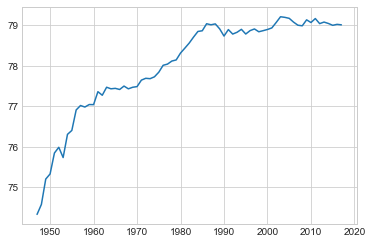

In [37]:
plt.plot(years['height'])